# James Harden Total Points by Season

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport
import pandas as pd

In [3]:
# Setup the transport and client
_transport = RequestsHTTPTransport(
    url='http://127.0.0.1:8000/graphql/',
    use_json=True,
)

client = Client(
    transport = _transport,
    fetch_schema_from_transport=True,
)

In [4]:
# Define Query
query = gql('''
query MyQuery {
  playerTotals(name: "James Harden") {
    playerName
    season
    team
    points
  }
}
''')



In [5]:
# Execute and store response

response = client.execute(query)

print(response)

{'playerTotals': [{'playerName': 'James Harden', 'season': 2023, 'team': 'PHI', 'points': 1216}, {'playerName': 'James Harden', 'season': 2022, 'team': 'TOT', 'points': 1432}, {'playerName': 'James Harden', 'season': 2022, 'team': 'BRK', 'points': 990}, {'playerName': 'James Harden', 'season': 2022, 'team': 'PHI', 'points': 442}, {'playerName': 'James Harden', 'season': 2021, 'team': 'TOT', 'points': 1083}, {'playerName': 'James Harden', 'season': 2021, 'team': 'HOU', 'points': 198}, {'playerName': 'James Harden', 'season': 2021, 'team': 'BRK', 'points': 885}, {'playerName': 'James Harden', 'season': 2020, 'team': 'HOU', 'points': 2335}, {'playerName': 'James Harden', 'season': 2019, 'team': 'HOU', 'points': 2818}, {'playerName': 'James Harden', 'season': 2018, 'team': 'HOU', 'points': 2191}, {'playerName': 'James Harden', 'season': 2017, 'team': 'HOU', 'points': 2356}, {'playerName': 'James Harden', 'season': 2016, 'team': 'HOU', 'points': 2376}, {'playerName': 'James Harden', 'season

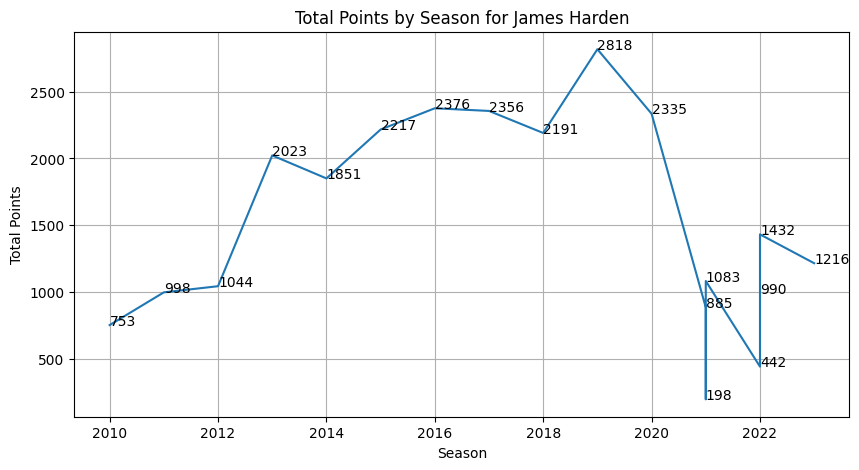

In [6]:
# Create pandas data frame

df = pd.DataFrame(response['playerTotals'])

# Plot Data

plt.figure(figsize=(10,5))

plt.plot(df['season'], df['points'])

# Label Points
for i, txt in enumerate(df['points']):
    plt.annotate(txt, (df['season'].iloc[i], df['points'].iloc[i]))

plt.xlabel('Season')
plt.ylabel('Total Points')
plt.title('Total Points by Season for James Harden')
plt.grid(True)

plt.show()